# My DCT

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as fft
from joblib import Parallel, delayed
from time import time
import csv

### Methods Definition

In [14]:
def dct2(A):
    return fft.dct(fft.dct(A, axis=0, norm='ortho'), axis=1, norm='ortho')

In [15]:
def my_dct(v):
    N = len(v)
    a = [0] * N
    for k in range(0, N):
        for i in range(0, N):
            a[k] += np.cos(np.pi * k * ((2 * i + 1) / (2 * N))) * v[i]
        den = N / 2
        if(k == 0): den = N
        a[k] = (a[k] / np.sqrt(den))
    return a

def my_dct2(A):
    N = len(A)
    A = np.array(A)
    for i in range(0, N):
        A[i] = my_dct(A[i])
    for j in range(0, N):
        A[:, j] = my_dct(A[:, j])
    return A

In [16]:
def process(mat):
    print("... Computing DCT2 - Matrix size: ", len(mat))
    start = time()
    dct2(mat)
    end = time()
    time_dct2 = end - start
    start = time()
    my_dct2(mat)
    end = time()
    time_my_dct2 = end - start
    print("DONE Computed DCT2 - Matrix size: ", len(mat))
    return [len(mat), time_dct2, time_my_dct2]

In [17]:
def new_matrix(N):
    print("... Generating matrix - Matrix size: ", N)
    return np.random.randint(0, 255, size=(N, N))

### Preliminary tests

In [18]:
test = [231, 32, 233, 161, 24, 71, 140, 245]
dct_test = fft.dct(test, norm='ortho')

print(dct_test)

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [19]:
mat = [[231, 32, 233, 161, 24, 71, 140, 245], 
         [247, 40, 248, 245, 124, 204, 36, 107], 
         [234, 202, 245, 167, 9, 217, 239, 173], 
         [193, 190, 100, 167, 43, 180, 8, 70], 
         [11, 24, 210, 177, 81, 243, 8, 112], 
         [97, 195, 203, 47, 125, 114, 165, 181], 
         [193, 70, 174, 167, 41, 30, 127, 245], 
         [87, 149, 57, 192, 65, 129, 178, 228]]

print(my_dct2(mat))
print(dct2(mat))

[[1117   43   75 -137    3  120  193 -101]
 [  76  113  -21   40    8   99  137   11]
 [  44  -62  111  -75  122   94  -39   58]
 [ -70  -39  -22  -76   26  -36   66  123]
 [-109  -43  -55    8   30  -28    2  -93]
 [  -5   55  171  -34   32   33  -57   18]
 [  78  -64  118  -14 -136  -30 -105   39]
 [  19  -78    1  -71  -21   80   63    5]]
[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.4143

matrices = []
for N in range(1, 50, 1):
    matrices.append(np.random.randint(0, 300, size=(N, N)))

#### Generation of exponential and linear sizes matrices

In [ ]:
seq = '2to330'

def wrapper(mat):
    with open('times' + seq + '.csv', 'a') as fileObj:
        writerObj = csv.writer(fileObj)
        writerObj.writerow(process(mat))

# Linear sizes
matrices = Parallel(n_jobs=5)(delayed(new_matrix)(N) for N in range(2, 500, 2))

# Exponential sizes
# matrices = Parallel(n_jobs=5)(delayed(new_matrix)(N) for N in (2**p for p in range(1, 11)))

print("\nDone generating matrices\n")

with open('times' + seq + '.csv', 'w') as fileObj:
        writerObj = csv.writer(fileObj)
        writerObj.writerow(['N', 'DCT2 Time', 'My DCT2 Time'])

times = Parallel(n_jobs=7)(delayed(wrapper)(m) for m in matrices)

### Plots

In [35]:
def plot(df, scale='log'):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(15, 10))
    ax = sns.lineplot(data=df, x="N", y="DCT2 Time", legend='brief', label='DCT2')
    sns.lineplot(data=df, x="N", y="My DCT2 Time", legend='brief', label='My DCT2')
    ax.set_yscale(scale)

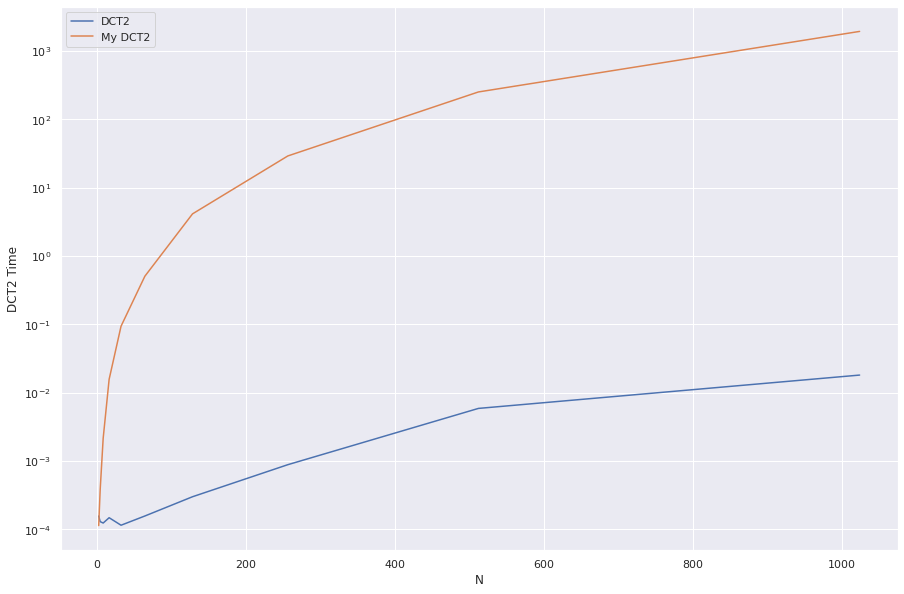

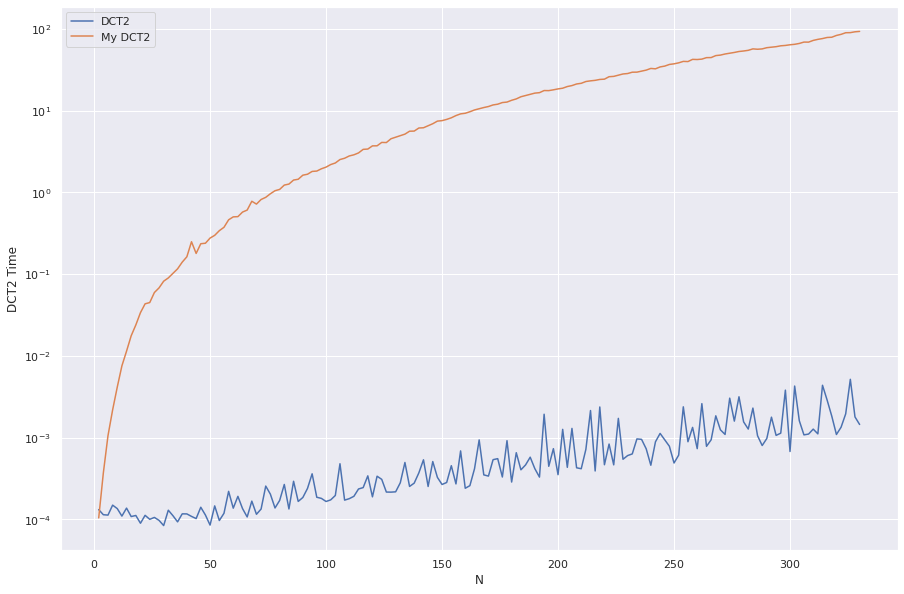

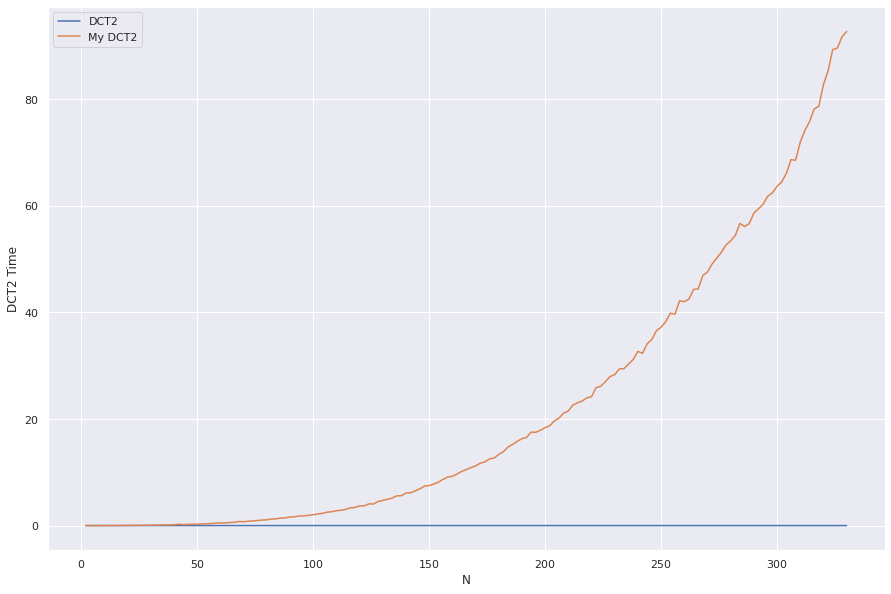

In [38]:
plot(pd.read_csv('times_2exp.csv'))
plot(pd.read_csv('times_2to330.csv'))
plot(pd.read_csv('times_2to330.csv'), scale='linear')